# Introduction
Here we are going to build neural network class such that we can actually train a model using our Value class.

# Libraries

In [135]:
import sys
sys.path.append("../../modules/Micrograd/")
from drawdot import draw_dot

In [136]:
###NN###
import random
from __future__ import annotations
from value import Value

# Module Class
This class has common functionality that will be used for all our other classes. It just has two functionalities: 1. It can take all parameters and set their gradients to zero, 2. It can return the parameters.

In [3]:
###NN###
class Module:

    def zero_grad(self):
        """
        Description:
            Sets the gradients of alle parameters to zero
        """
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        """
        Description:
            Returns the parameters
        """
        return []

In [6]:
# Testing functionality
m = Module()
m.zero_grad()
m.parameters()

[]

# Neuron Class
The **Neuron Class** lets you create a neuron with a random weight for each input value.

In [107]:
###NN###
class Neuron(Module):

    def __init__(self, nin: int, nonlin: bool = False) -> Neuron:
        """
        Description:
            Creates a neuron with nin weights.
        Inputs:
            nin: How many paramters the neuron should have
            nonlin: Whether a non-linear activation should be applied
        """
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(0)
        self.nonlin = nonlin

    def __call__(self, xs: list) -> Value:
        """
        Description:
            Given a list of xs the forward pass is executed
        Inputs:
            xs: A list of x-values
        Outputs:
            The calculated forward pass value
        """
        act = sum((wi*xi for wi,xi in zip(self.w, xs)), self.b)
        return act.relu() if self.nonlin else act

    def parameters(self):
        """
        Description:
            Returns a list of parameters as well as the bias
        Outputs:
            The neuron parameters and bias
        """
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

In [38]:
# Initializing Neuron with four parameters
n = Neuron(4)

In [39]:
# Forward Pass
n([1,2,3,4])

Value(data=3.46199320202204, data=0.0)

# Layer Class
This class lets you create a layer of neurons.

In [58]:
###NN###
class Layer(Module):

    def __init__(self, nin, nout, **kwargs) -> Layer:
        """
        Description:
            Creates a layer (list of neurons).
        Inputs:
            nin: Neuron dimensionality
            nout: Number of neurons in layer
        """
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, xs) -> Value:
        """
        Description:
            Calculates the output for each neuron with 
            the given input values
        Inputs:    
            xs: Input values
        Outputs:
            The calculated forward pass value
        """
        out = [n(xs) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self) -> list:
        """
        Description:
            Returns a list of all parameters in the layer
        Ouputs:
            List of parameters
        """
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

In [55]:
# Creating a layer
l = Layer(4, 5)

In [59]:
# Calculating outputs for each neuron in the layer
l([1,2,3,4])

[Value(data=2.8375403292408823, data=0.0),
 Value(data=2.156062733409277, data=0.0),
 Value(data=0, data=0.0),
 Value(data=1.9611518576003397, data=0.0),
 Value(data=2.8312122775686914, data=0.0)]

# Multi-Layer Percepton Class

In [108]:
###NN###
class MLP(Module):

    def __init__(self, nin: int, nouts: list) -> MLP:
        """
        Description:
            The multi-layer perceptron feeds the outputs of one 
            layer into the next. Here a list of layers is added 
            to the MLP object.
        Inputs:
            nin: Number of inputs to MLP
            nouts: List of outputs for each layer            
        """
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, xs: list) -> list | Value:
        """
        Description:
            Give inputs it calculates the MLP output via 
            a forward pass.
        Inputs:
            xs: Input values
        Outputs:
            The number af values given by the last layer
        """
        for layer in self.layers:
            xs = layer(xs)
        return xs

    def parameters(self):
        """
        Description:
            Returns a list of all parameters in the layer
        Ouputs:
            List of parameters
        """
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

In [124]:
# Creating Multi-layer perceptron
mlp = MLP(3,[4,4,1])

In [125]:
# Running af forward pass
mlp([1,2,3])

Value(data=-1.1031942582960799, data=0.0)

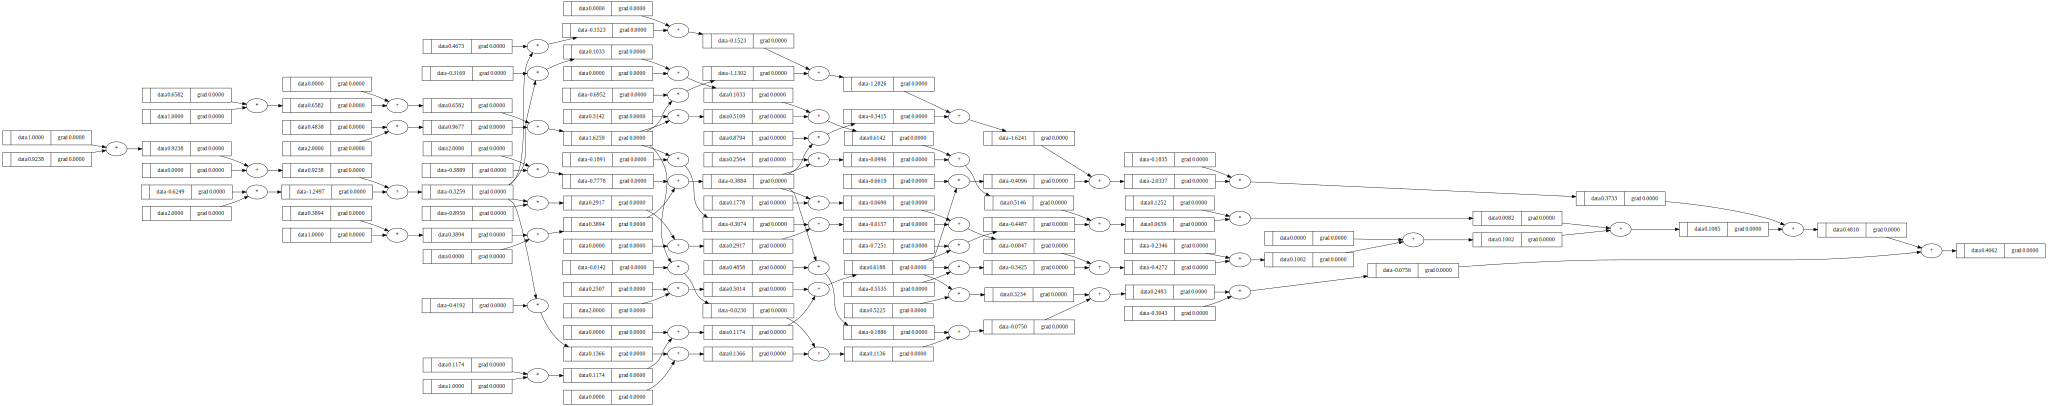

In [127]:
# Drawing Expression Tree
draw_dot(mlp([1,2]))

# Training a Neural Network

In [129]:
# Inputs
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]

In [130]:
# Desired outputs
ys = [1.0,-1.0,-1.0,1.0]

In [131]:
# Create a MLP
mlp = MLP(3,[4,4,1])

In [134]:
# Getting initial predicitions
ypred = [mlp(x) for x in xs];ypred

[Value(data=1.8143046456130858, data=0.0),
 Value(data=2.4871785162865496, data=0.0),
 Value(data=-0.15575310881347312, data=0.0),
 Value(data=1.2010974803992551, data=0.0)]

In [ ]:
###CONTINUE HERE###
#http://www.youtube.com/watch?v=VMj-3S1tku0&t=111m0s

# Writing Cells to Module
Here we write the Value class to a module by labeling the cell with ###NN###.

In [137]:
!python3.10 ../../helpers/ipynb_to_py.py 4.\ Neural\ Network\ Module.ipynb "###NN###" ../../modules/Micrograd/nn.py

INFO: Cells with label ###NN### extracted from 4. Neural Network Module.ipynb
